## Model Comparison

Find a data set and build a KNN Regression and an OLS regression. Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs to describe the models' behaviors and why you favor one model or the other. Try to determine whether there is a situation where you would change your mind, or whether one is unambiguously better than the other. Lastly, try to note what it is about the data that causes the better model to outperform the weaker model. 

In [12]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
%matplotlib inline

data = pd.read_csv('../Data/world-happiness-report/2015.csv',skiprows=1,usecols=[0,3,5,6,7,8,9,10,11],index_col=0,names=['Country','Happiness','GDP','Family','LifeExpectancy','Freedom','Trust','Generosity','Dystopia'])
data.head()

,Happiness,GDP,Family,LifeExpectancy,Freedom,Trust,Generosity,Dystopia
Country,,,,,,,,
Switzerland,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
Iceland,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
Denmark,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
Norway,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
Canada,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Linear regression (GDP, Family, Freedom, Dystopia):

In [2]:
data.corr()

,Happiness,GDP,Family,LifeExpectancy,Freedom,Trust,Generosity,Dystopia
Happiness,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
GDP,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
LifeExpectancy,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia,0.530474,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


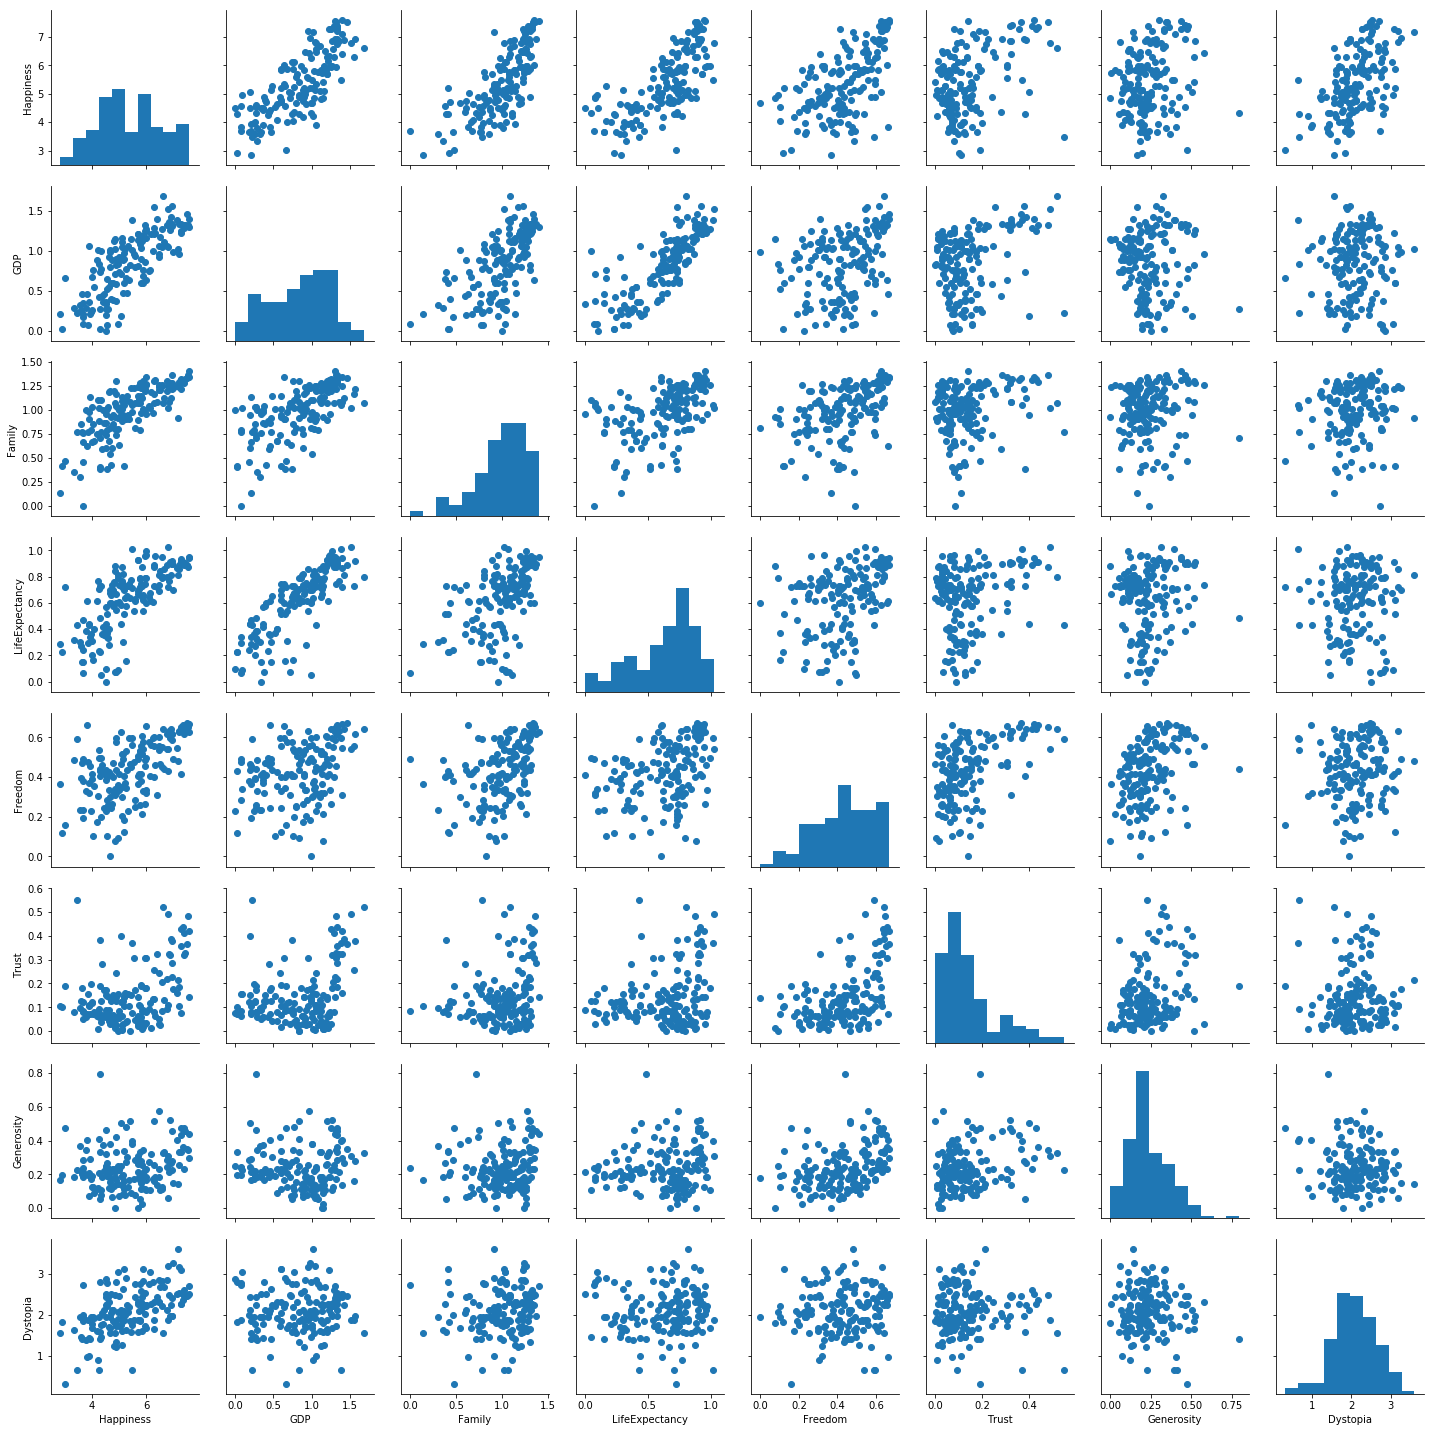

In [86]:
g = sns.PairGrid(data)
#g.map(plt.scatter)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

There appears to be a linear relationship between happiness, GDP, family, life expectancy, freedom and dystopia. Trust and generosity do not appear to be correlated.

In [57]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
X = data.loc[:,['GDP','Family','LifeExpectancy','Freedom','Dystopia']]
Y = data['Happiness']
ols.fit(X, Y)

# Display the attributes we calculated.
print('Coefficients: \n', ols.coef_)
print('Intercept: \n', ols.intercept_)

from sklearn.model_selection import cross_val_score
score_ols = cross_val_score(ols, X, Y, cv=5)
print("OLS Accuracy: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

Coefficients: 
 [0.96125165 0.95532052 1.0940454  1.73467664 0.96069509]
Intercept: 
 0.16609949825910864
OLS Accuracy: 0.37 (+/- 0.52)


KNN (GDP, Family, Freedom, LifeExpectancy, Dystopia):

In [71]:
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=1, weights='distance')
X = data.loc[:,['GDP','Family','LifeExpectancy','Freedom','Dystopia']]
Y = data['Happiness']
knn_w.fit(X, Y)

from sklearn.model_selection import cross_val_score
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted KNN (k=1) Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Weighted KNN (k=2) Accuracy: -4.83 (+/- 1.44)


Using a five variable regression (GDP, Family, Freedom, Life Expectancy and Dystopia), the accuracy for the OLS regression is much better than the KNN regression. Using k=1 for the KNN regression seems to have the smallest std in cross validation score and is still significantly higher than the OLS.

For visualization purposes, a single variable regression is clearer. Using only GDP:

In [53]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
X = data.loc[:,['GDP']]
Y = data['Happiness']
ols.fit(X, Y)

# Display the attributes we calculated.
print('Coefficients: \n', ols.coef_)
print('Intercept: \n', ols.intercept_)

from sklearn.model_selection import cross_val_score
score_ols = cross_val_score(ols, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))

Coefficients: 
 [2.21822712]
Intercept: 
 3.4988096598243636
Weighted Accuracy: -10.13 (+/- 9.06)


Weighted Accuracy: -12.64 (+/- 6.81)


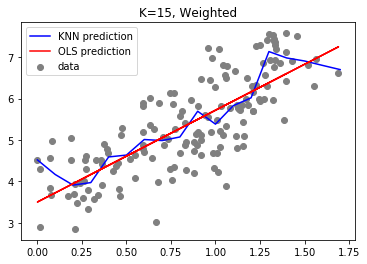

In [85]:
from sklearn import neighbors

knn_w = neighbors.KNeighborsRegressor(n_neighbors=15, weights='distance')
X = data.loc[:,['GDP']]
Y = data['Happiness']
knn_w.fit(X, Y)

from sklearn.model_selection import cross_val_score
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

T = np.arange(0, 1.8, 0.1)[:, np.newaxis]
Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='gray', label='data')
plt.plot(T, Y_, c='blue', label='KNN prediction')
plt.plot(data['GDP'],lm.predict(data['GDP']), c='r', label='OLS prediction')
plt.legend()
plt.title('K=15, Weighted')
plt.show()

Using only GDP, cross validation appears to suggest that KNN regression is more consistent than the OLS regression. However, looking at the scatter plot of GDP vs. happiness, it looks like the relationship is linear. The KNN prediction is less smooth but appears to just be oscillating around the OLS prediction, suggesting that this deviation may just be due to noise within the data. There is a reasonable amount of scatter from both regression lines so it's possible that this oscillating pattern is accurate but there is no intuitive reason for it to show this pattern. For a non-linear relationship, KNN would be better, although adding additional features to the OLS might help account for the non-linearity.